# Load Data

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
#make the random seed the same throughout the programme. 
np.random.seed(42)

iris = datasets.load_iris()

X = iris['data'][:, (2, 3)] #load Petal Length and Petal Width
y = (iris['target'] == 2).astype(np.int)

(skip looking at the data since we know what it looks like)

# Clean Data

In [2]:
svm_clf = Pipeline([
    ('Scale', StandardScaler()),
    ('Linear_SVC', LinearSVC(C=1, loss= 'hinge'))
])

svm_clf.fit(X, y)


Pipeline(memory=None,
         steps=[('Scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Linear_SVC',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

# Support Vector Machines (SVM)

## Linear SVM Classification 
This is similiar to Logistical Regression where a decision boundary line seperates the <u>2 clusters</u>. The decision boundary is represented as a Dashed Line signifiying the 50% probability. This line could also be thought of as coming half way between parallel lines where each parallel line interacts with the nearest instance of the training set. The SVM can be thought of as a road where instances are on either edge of the road. The closer the instance the smaller the road. This is called <b> Large Margin Classification </b> - make the road as big as possible no matter what, as long no instances are on it!

However, Large Margin Classification does not work well for 'tight' classes and possible outliers, and instance crossovers.

We need to limit the number of instances on the road, and on the wrong side of the road (i.e. <u> Margin Violations </u>), yet still keep the street as large as possible. This is called <b> Soft Margin Classification </b>. A smaller road may mean overfitting and not generalizing well, therefore, increase 'C' (discussed in Logistic_Regression_Iris_Dataset Notebook) will help reduce regulization.

Conversely, if the model is overfitting then regularize by reducing C (remember: alpha = 1/C). 


#### When Using LinearSVC:

1. StandardScaler your dataset.
2. Set Hyperparameter to (loss=)'hinge'
3. Dual= False (for datasets that have more training instances then features).

#### Use Stochaistic Gradient Descent for large datasets and online classification tasks:
1. loss= 'hinge'
2. alpha=(1/m*C)
(it does not converge as fast as linear but it works well with large datasets).

# Complex Model - Non-Linear SVM Classification

Here is an example of Non-Linear classification 


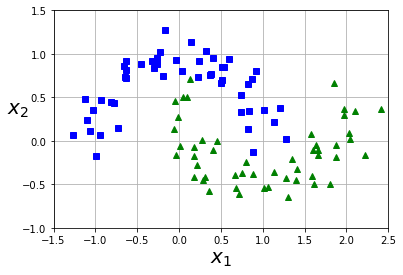

C:\Users\Ashish\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(memory=None,
         steps=[('PolyFeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('Standardization',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('SVC',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [3]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise= 0.15)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()


polynomial_SVM_clf = Pipeline([
    ('PolyFeatures', PolynomialFeatures(degree=3,)),#play around with the degree and see what happens to the model. 
    ('Standardization', StandardScaler()),
    ('SVC', LinearSVC(C=10, loss='hinge', random_state=42))
])

polynomial_SVM_clf.fit(X, y)

In [4]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)


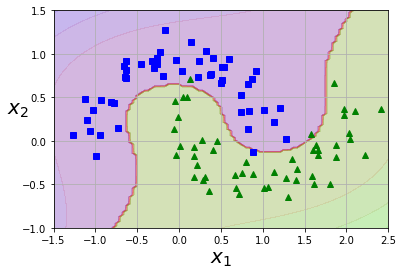

In [5]:
plot_predictions(polynomial_SVM_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

#### Using Linear SVM we are able to plot polynomial features by changing the degrees on the provided.
Scroll back up and change the degree and look what happens to the model. It starts over fitting the data and placing all values (even possible anomlies in your dataset) with the labelled classifier.

#### But how do you determine the degree that you require in your data set? 

##### A good trick is use Kernel= 'poly' in the SVM parameters and setting the (feature) degree that you require, without actually adding any combinational feature explosions in your dataset.  

Kernel's allows you to map features explicitly by using a similarity function on each of your instances.
The Kernel tricks lets you seperate non-linear data into linearly seperable data, which can therefore' be used to map a LinearSVC (in this case). 
With the Gaussian RBF Kernel (explained below), it allows us to obtain results as if you added many similarity features but without actually adding them (which helps reduce the computainal complexity).

To make it clear, a Kernel is a function capable of computing the dot product of transforming 2 matrices (for example, using Second-Degree polynomial mapping) without actualling carrying out the mapping itself (i.e. use the Kernel trick formula itself). The 2 matrices, say A and B, have an equivalent mapping function if they both meeting Mercer's conditions (i.e. Continous and symmetric so that K(a,b) = K(b,a), where K is considered the Kernel). However, in some cases such as Sigmoid not all conditions apply but still work well in practice.

Other Kernels include: 
1. Linear
2. Polynomial
3. Gaussian RBF
4. Sigmoid

In [6]:
from sklearn.svm import SVC

poly_kernel_SVM_clf = Pipeline([
        ("Scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=1, C=5))
    ])
poly_kernel_SVM_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('Scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=10,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

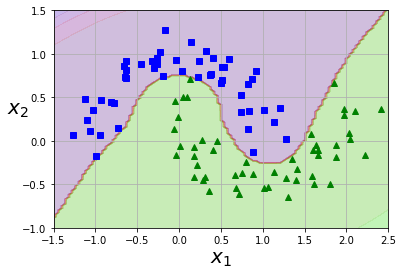

In [7]:
plot_predictions(poly_kernel_SVM_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()


# Gaussian RBF Kernel 

You can combine features using the similarity function (Gaussian Radial Basis Function - RBF). This combines non-linear features and aids into making the training set linearly seperable. But you may end up with a large number of features, possible m instances of features.

To <b>compute additional features is computationally intensive</b>: 

First you need to assign two 'land mark' instances and the <b>Gamma hyperparameter</b> value that is used in the Gaussian RBF equation. Then create another landmark at the location of each and every instance in the dataset.
Repeating the above till you transform a dataset that is linearly separable. 
With a training set that has m instances and n features you could potenially end up with m features or <u>a lot </u>more. 

<i> There are many other Kernels to choose from but on first instance you should use LinearSVC as it is much faster than SVC(kernel='linear') for large datasets. If your data set is small then you could try RBF aswell before experimenting with other kernals (MUST use CROSS VALIDATION AND GRID SEARCH!). There are other specialized Kernels specific to certain data structures. </i> 

#### There is a solution! 
##### set the SVC's kernel= 'rbf, assign hyper parameter values gamma and C. 

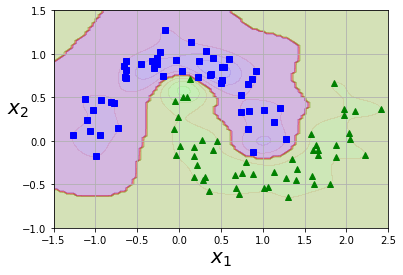

In [8]:
rbf_kernel_SVC_clf1 = Pipeline([
    ('StandardScaler', StandardScaler()),
    ('SVC_CLF', SVC(kernel='rbf', gamma=5, C= 1000,random_state=42))#assign Gamma and C*
])

rbf_kernel_SVC_clf1.fit(X, y)

plot_predictions(rbf_kernel_SVC_clf1, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

# LOOK AT HYPER PARAMETER VALUES!

## GAMMA AND C NEED TO BE OPTIMISED

#### Increasing Gamma makes the bell shape narrower (i.e. each instances range of influence is smaller and therefore, the Decision Boundary become irregular and over fits.

#### Decreasing Gamma makes the bell shape bigger and instances have a wider influence! So the Decision Boundary curve become smoother.

Recall that the hyperparameter C determines the regularization strength. The higher the value the <u> less </u> the regularization (i.e. not inclusive of future results). 

Conversely, the lower the C value, stronger the regularization. Remember that C is the inverse of Alpha in LinearRegression. 

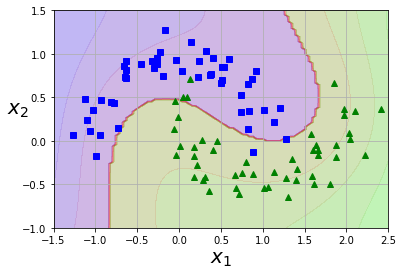

In [9]:
rbf_kernel_SVC_clf2 = Pipeline([
    ('StandardScaler', StandardScaler()),
    ('SVC_CLF', SVC(kernel='rbf', gamma=0.1, C= 100,random_state=42))
])

rbf_kernel_SVC_clf2.fit(X, y)

plot_predictions(rbf_kernel_SVC_clf2, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

# Rule

## Overfitting ? Reduce Gamma, Reduce C

## Under-fitting ? Increase Gamma, Increase C
play around with the gamma and C values above, I suggest the following:

1. gamma= 0.1, C= 0.001
2. gamma= 0.1, C= 1000
3. gamma= 5, C= 0.001 
4. gamma= 5, C= 1000


The hyperparameter C allows us to define trade off for soft margin vs large margin. With soft margin linear SVM classifier objective equation the slack variable measures how much the ith instance is allowed to violate the margin. We need to make this as small as possible (to reduce the number of instance within the margin), while making the 1/2||W^(Transpose).W|| (norm of the decision function boundary) small to increase the margin. 
Where does the C Parameter come in? It trades of between the norm of the decision function boundary and the slack variable (greek letter - Zeta). 


### Computational Demand

There are many more Kernels...but remember that the LinearSVC does not allow use of the Kernel trick but uses an optimised algorithm. The good thing about LinearSVC is that it scales Linearly with, the number of instances and features, where the training time is O(m x n) long unless you change the tolerance hyperparameter (tol, E) but the default value is typical acceptable for most datasets. Here is a link to 'A Dual Coordinate Descent Method for Large-scale Linear SVM' - https://www.csie.ntu.edu.tw/~cjlin/papers/cddual.pdf. Which discusses and compares other SVM gradient descent methologies.

On the other hand, the SVC class supports the Kernel trick, where training time varies between O(m^2 x n) to O(m^3 x n). Therefore, it gets really slow for larger datsets. Here is a link to 'Sequential Minimal Optimization: A Fast Algorithm for Training Support Vector Machines' - https://www.microsoft.com/en-us/research/publication/sequential-minimal-optimization-a-fast-algorithm-for-training-support-vector-machines/. The Sequential Minimal Optimization (SMO) breaks large quadratic programming problems into several small ones which are solved analytically instead of optimization (i.e. think of the normal equation of using partial derivatives to find the exact minimum location). 

Fortunetly, Ski-kit learn also has comparison tables within the documentation that also compares out-of-core support. 

<b> One more thing... </b>

A support vector machine does not compute any instances outside the margin, only those that are on street, which makes it less complex. The support vectors (i.e. instances that are on the street) only affect the decision boundary, other instances (no matter the quantity) off the street will not affect the predictions.

If you set probability= True, the SVM will use Logistical Regression to assign probability methods to the SVM model (i.e. predict_proba()). 

# SVM Regression

SVM can be used for the following models by chaging the kernel values:

<li>Linear Regression </li> (also can use LinearSVR, as shown on the code below - faster for bigger datasets!)
<li>Non-Linear Regression </li>
<li>Linear Classification </li> (use Linear SVC)
<li>Non-Linear Classification </li>
<li> Outlier Detection </li>

To change the SVM to a Regression model, you can change the <b> hyperparameter</b> E (epsilon). Instead of removing instances off the road, it places as many instance within the road (where the width of the road is based on E).

In [10]:
#Load Data
np.random.seed(42)
m = 20
X = 8 * np.random.rand(m, 1)
y = (10 + 2 * X + np.random.randn(m, 1)).ravel()#continous array instead of single matrices

In [11]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

In [12]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

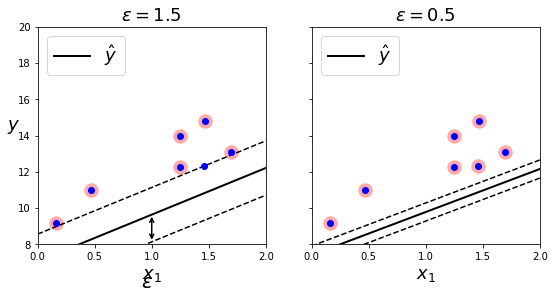

In [13]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 8, 20])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 8, 20])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

Epsilon is the width of one side of the road.
##### changing the value of E does not effect the model (i.e. Linear Regression Line) itself. The model is <i> epsilon-insensitive </i> - increasing the number of instances within the road does not change the model.

# Linear SVC vs SVC vs SGDClassifier

## Load Linearly Seperable Data

In [14]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"] #classification
setosa_or_versicolor = (y == 0) | (y == 1) #True for values of 0 or 1 otherwise False
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

## Train Models

In [15]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
np.random.seed(42)

C = 5
alpha = 1 / (C * len(X)) #1/ C * m

linear_reg = LinearSVC(loss= 'hinge', random_state=42, C=C)
SVC_Clf = SVC(kernel= 'linear')
SGD_Clf = SGDClassifier(loss= 'hinge', learning_rate='constant', eta0=0.001, alpha=alpha,
                       tol= 0.0001, random_state=42, max_iter=1000)

std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)

linear_reg.fit(X_scaled, y)
SVC_Clf.fit(X_scaled, y)
SGD_Clf.fit(X_scaled, y)


print("LinearSVC:                    {} {}".format(linear_reg.intercept_, linear_reg.coef_))
print("SVC:                          {} {}".format(SVC_Clf.intercept_, SVC_Clf.coef_))
print("SGDClassifier(alpha={:.5f}):".format(SGD_Clf.alpha), SGD_Clf.intercept_, SGD_Clf.coef_)

LinearSVC:                    [0.28474027] [[1.0536456  1.09903032]]
SVC:                          [0.32182521] [[1.04342638 0.94747825]]
SGDClassifier(alpha=0.00200): [0.259] [[0.98538661 0.91716034]]


# Plot Models

Note that plotting graphs is not typical. We are fortunate because we have 2 features but if we had more then this would be extremely difficult.

In [16]:
linear_reg.coef_

array([[1.0536456 , 1.09903032]])

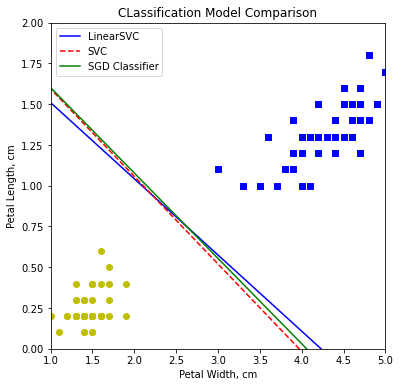

In [17]:
""" We need to divide our coefficients, the slope of line can be calculated using the weights by using
the .coef_ attribute (x1, x2). Thus to calculate the slope we divide the weights of x1, and x2. 
This gives a scalar W. Then apply the same
y axis = Length, x axis = Width;
"""
w1 = -linear_reg.coef_[0, 0]/linear_reg.coef_[0, 1]
b1 = -linear_reg.intercept_[0]/linear_reg.coef_[0, 1]
w2 = -SVC_Clf.coef_[0, 0]/SVC_Clf.coef_[0, 1]
b2 = -SVC_Clf.intercept_[0]/SVC_Clf.coef_[0, 1]
w3 = -SGD_Clf.coef_[0, 0]/SGD_Clf.coef_[0, 1]
b3 = -SGD_Clf.intercept_[0]/SGD_Clf.coef_[0, 1]

plt.figure(figsize= (6,6))
# Transform the decision boundary lines back to the original scale 
line1 = std_scaler.inverse_transform([[-8, -10 * w1 + b1], [8, 10 * w1 + b1]])
line2 = std_scaler.inverse_transform([[-8, -10 * w2 + b2], [8, 10 * w2 + b2]])
line3 = std_scaler.inverse_transform([[-8, -10 * w3 + b3], [8, 10 * w3 + b3]])

#plot lines
plt.plot(line1[:,0], line1[:,1], 'b-', label= 'LinearSVC')
plt.plot(line2[:,0], line2[:,1], 'r--', label= 'SVC')
plt.plot(line3[:,0], line3[:,1], 'g-', label= 'SGD Classifier')

#plot data 
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") 
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")  

#make plot look pretty
plt.legend()
plt.axis([1,5, 0, 2])
plt.title('CLassification Model Comparison')
plt.xlabel('Petal Width, cm')
plt.ylabel('Petal Length, cm')
plt.show()

### As you can see there are very fine differences between the models, and you have to identify which one to use for the right application. 